<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [1]:
student_number = '401170637'
Name = 'Bardia'
Last_Name = 'Mandegar' 

# Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [3]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X = np.random.uniform(range_start, range_end, num_samples)
    f_x = 0.2 * X ** 6 - 0.5 * X ** 5  + 2 * X ** 4 - 5 * X ** 3 + 3 * X ** 2 - 10 * X + 5
    noise = np.random.normal(0, noise_std, num_samples)
    y = f_x + noise
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

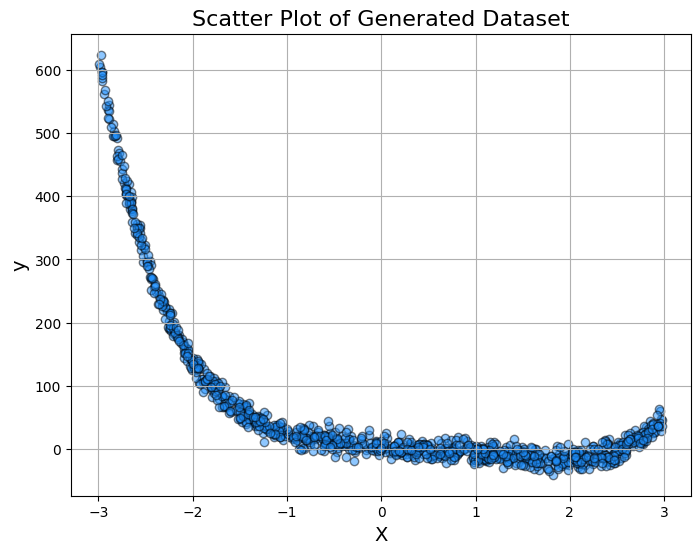

In [4]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='dodgerblue', alpha=0.5, edgecolors='k')
plt.title('Scatter Plot of Generated Dataset', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [5]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_in_range_test, y_train, y_in_range_test = train_test_split(X, y, test_size = 0.2)

# TODO: Generate the out-of-range testing set
X_out_of_range_test, y_out_of_range_test = generate_dataset(5, 7, len(X_in_range_test))

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

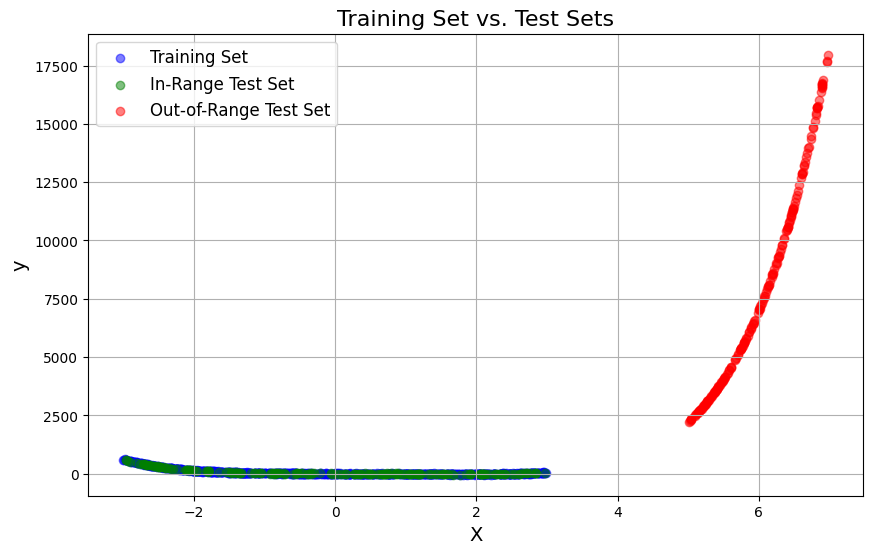

In [6]:
# TODO: Visualize the sets using scatter (or other plots)
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Set')
plt.scatter(X_in_range_test, y_in_range_test, color='green', alpha=0.5, label='In-Range Test Set')
plt.scatter(X_out_of_range_test, y_out_of_range_test, color='red', alpha=0.5, label='Out-of-Range Test Set')

plt.title('Training Set vs. Test Sets', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [7]:
from sklearn.pipeline import Pipeline

def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])
    X = X.reshape(-1, 1)
    model.fit(X, y)
    return model

In [8]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for degree in range(2, 10):
    models[degree] = train_models(X_train, y_train, degree)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [9]:
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses = {}
    X_test = X_test.reshape(-1, 1)
    for degree, model in models.items():
        y_pred = model.predict(X_test)
        losses[degree] = mean_squared_error(y_test, y_pred)
    return losses

In [10]:
# TODO: Evaluate models on both the train and the test sets.

train_losses = evaluate_models(models, X_train, y_train)
in_range_losses = evaluate_models(models, X_in_range_test, y_in_range_test)
out_of_range_losses = evaluate_models(models, X_out_of_range_test, y_out_of_range_test)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

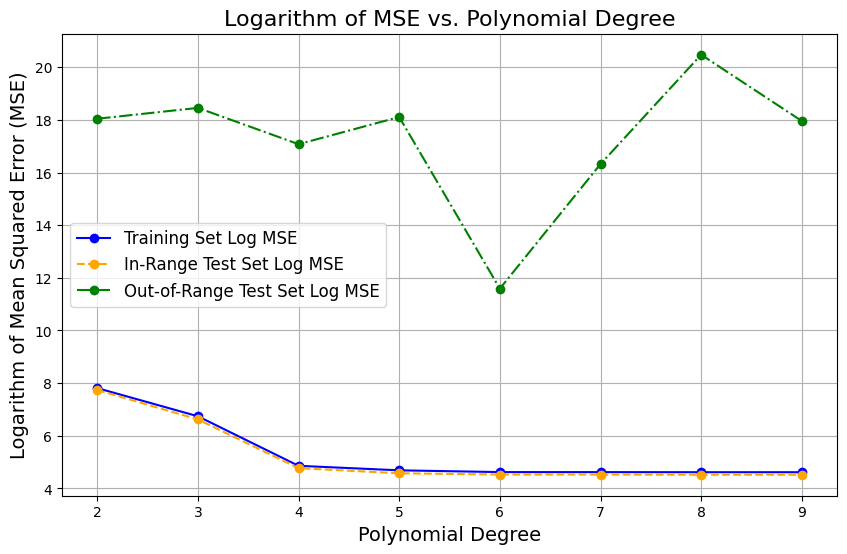

In [11]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9

degrees = list(models.keys())
train_log_mse = [np.log(mse) for _, mse in train_losses.items()]
in_range_log_mse = [np.log(mse) for _, mse in in_range_losses.items()]
out_of_range_log_mse = [np.log(mse) for _, mse in out_of_range_losses.items()]

# TODO: Plot the log MSE results

plt.figure(figsize=(10, 6))

plt.plot(degrees, train_log_mse, 'o-', color='blue', label='Training Set Log MSE')
plt.plot(degrees, in_range_log_mse, 'o--', color='orange', label='In-Range Test Set Log MSE')
plt.plot(degrees, out_of_range_log_mse, 'o-.', color='green', label='Out-of-Range Test Set Log MSE')

plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('Logarithm of Mean Squared Error (MSE)', fontsize=14)
plt.title('Logarithm of MSE vs. Polynomial Degree', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.show()

In [12]:
# TODO: Print each model loss on the training and the two test sets

print(f"{'Degree':^10} {'Train MSE':^20} {'In-Range Test MSE':^20} {'Out-of-Range Test MSE':^20}")
for degree in range(len(train_log_mse)):
    print(f'{degree + 2:^10} {train_log_mse[degree]:^20.2f} {in_range_log_mse[degree]:^20.2f} {out_of_range_log_mse[degree]:^20.2f}')

  Degree        Train MSE        In-Range Test MSE   Out-of-Range Test MSE
    2              7.81                 7.74                18.04        
    3              6.74                 6.62                18.45        
    4              4.86                 4.77                17.08        
    5              4.69                 4.58                18.11        
    6              4.62                 4.53                11.59        
    7              4.62                 4.53                16.32        
    8              4.62                 4.52                20.47        
    9              4.62                 4.52                17.96        


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** We see that initially, the bias is very high, meaning the model doesn't even predict training data well. As the degree of polynomial increases, the model learns well, unitl degree of 6, which is the best-learnt model. After that, the model starts to memorize data and captures noise instead of considering general patterns. This shows high variance of the model. It leads to even lower training loss, but the out-of-range test loss increases sharply. This actually is a famous sign of overfitting. So, incereasing the degree improves the model performance, but from somewhere farther, the complexity gets too high, which leads to poor performance.</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** Higher model complexity, decreases the bias and increases the variance. In this problem, higher degree of polynomial makes the model more complex, so increasing the degree, leads to lower bias and higher variance. High bias is underfitting and high variance is overfitting. There's a trade-off between these two and we avoid each of which to be high, so the optimal degree occurs somewhere in the middle.</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [13]:
file_path = "./InsuranceData.csv"
# TODO: Load the Dataset
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [14]:
# TODO: you can use .info() and .description()

print("Dataset Information:")
print(df.info())
print("\n")

print("Descriptive Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000

# Preprocessing

In [15]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

mapping = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(mapping)

X = df.drop(columns=['charges'])
y = df['charges']

numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'region']
other_features = ['smoker']

transform = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_features),
    ('categorical', OneHotEncoder(), categorical_features),
    ('others', 'passthrough', other_features)
])

X_transformed = transform.fit_transform(X)

In [16]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

# Training

Fit a linear regressor to the data.

In [17]:
# TODO: Use sklearn

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

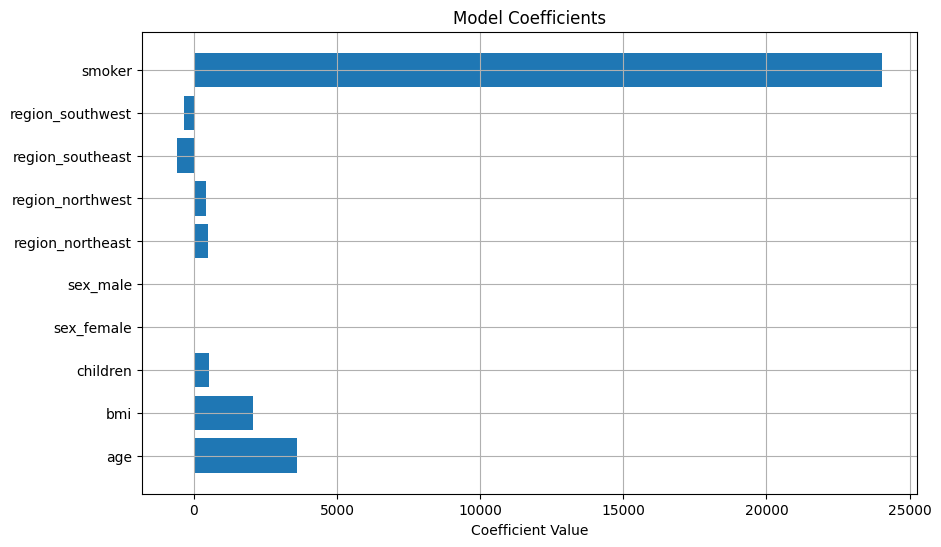

In [18]:
# TODO:

def plot_coefficients(model, feature_names, title="Model Coefficients"):
    coefficients = model.coef_

    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients)
    plt.xlabel('Coefficient Value')
    plt.title(title)
    plt.grid(True)
    plt.show()

all_features = np.concatenate([numerical_features, transform.named_transformers_['categorical'].get_feature_names_out(['sex', 'region']), other_features])

plot_coefficients(linear_regressor, all_features)

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [19]:
# TODO: Use Lasso from sklearn library

lasso_regressor = Lasso(alpha=0.1, max_iter=10000)

lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [20]:
# TODO: Use Ridge from sklearn library

ridge_regressor = Ridge(alpha=1, max_iter=10000)

ridge_regressor.fit(X_train, y_train)

Ridge(alpha=1, max_iter=10000)

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

Linear Regression Mean MAPE: 0.43236255857580136


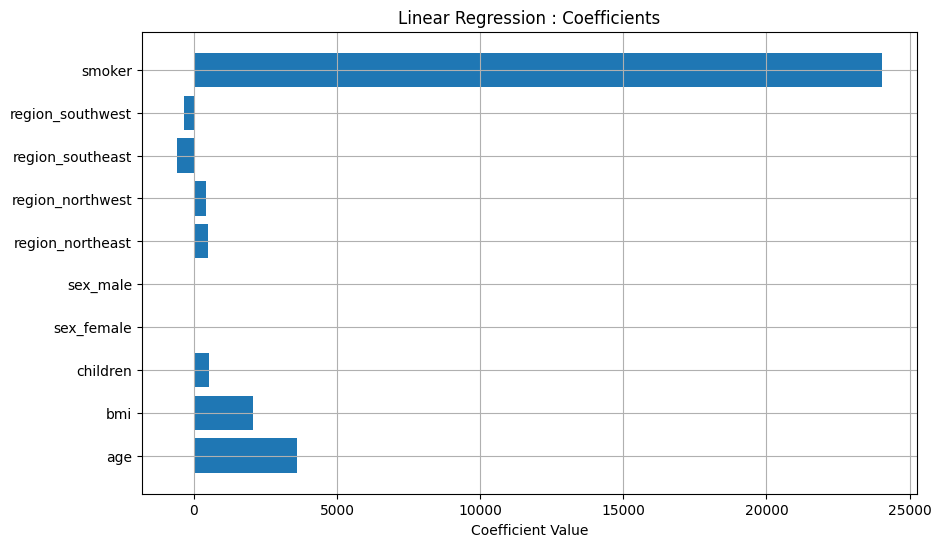

Lasso Regression Best Alpha: 0.001
Lasso Regression Best Model MAPE: 0.43097544384767217


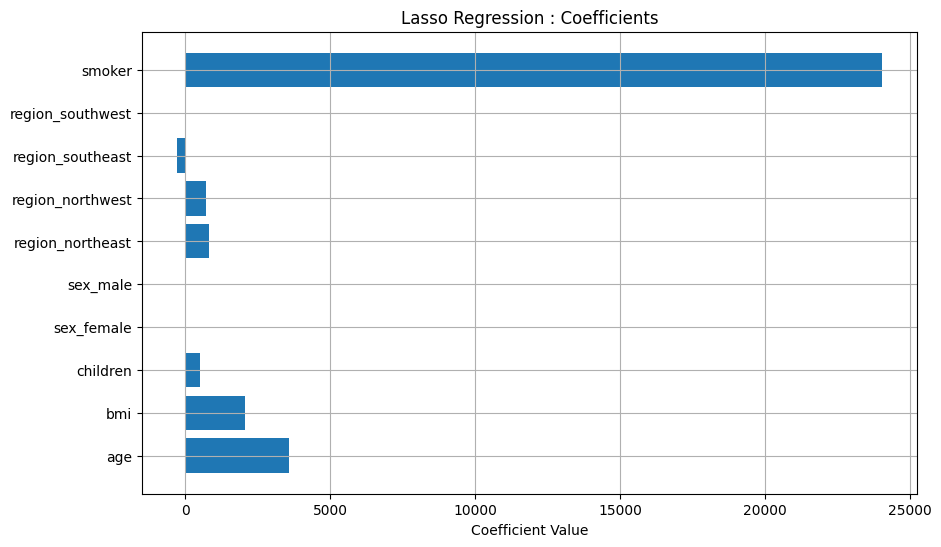

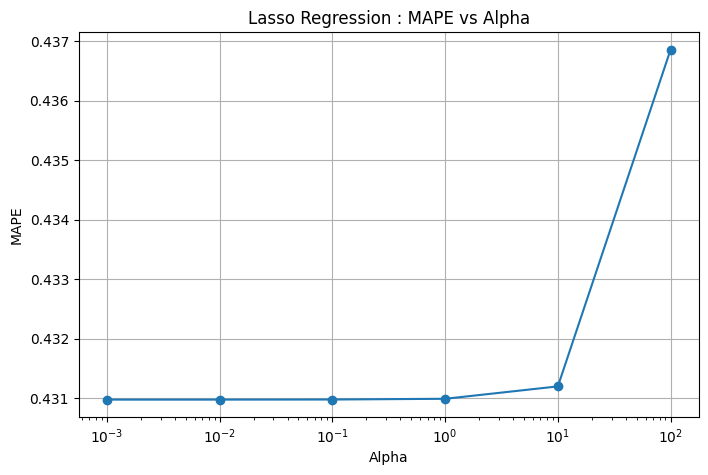

Ridge Regression Best Alpha: 0.001
Ridge Regression Best Model MAPE: 0.43097784783793297


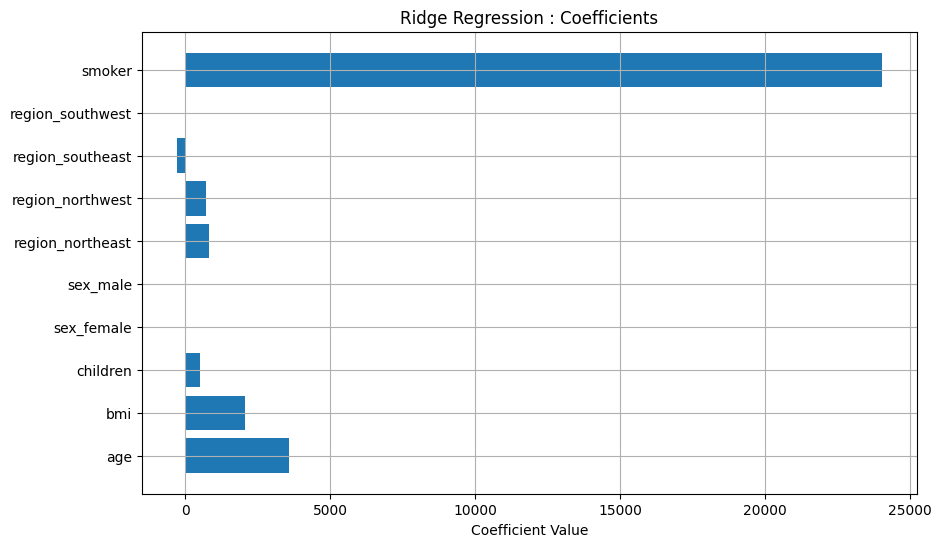

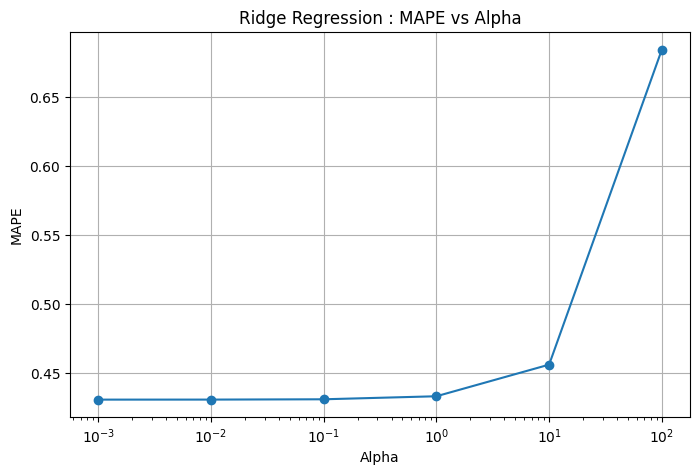

In [21]:
# TODO: Use folding methods and mape from sklearn library

def model_mape_evalutation(model, X, y_real):
    y_pred = model.predict(X)
    return mean_absolute_percentage_error(y_real, y_pred)

def plot_mape_vs_alpha(alphas, mape_scores, title="MAPE vs Alpha"):
    plt.figure(figsize=(8, 5))
    plt.plot(alphas, mape_scores, marker='o', linestyle='-')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('MAPE')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Linear Regression

linear_regressor = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
linear_mape_scores = cross_val_score(linear_regressor, X_train, y_train, cv=kfold, scoring=model_mape_evalutation)

mean_mape_score = np.mean(linear_mape_scores)
print(f'Linear Regression Mean MAPE: {mean_mape_score}')

linear_regressor.fit(X_train, y_train)
plot_coefficients(linear_regressor, all_features, 'Linear Regression : Coefficients')

# Lasso Regression

alphas = [0.001, 0.01, 0.1, 1, 10, 100]

lasso_mape_scores = []
for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha, max_iter=1000000)
    model_mape_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=kfold, scoring=model_mape_evalutation)
    lasso_mape_scores.append(np.mean(model_mape_scores))

best_alpha = alphas[np.argmin(lasso_mape_scores)]
print(f'Lasso Regression Best Alpha: {best_alpha}')
print(f'Lasso Regression Best Model MAPE: {min(lasso_mape_scores)}')

lasso_regressor = Lasso(alpha=best_alpha, max_iter=1000000)
lasso_regressor.fit(X_train, y_train)

plot_coefficients(lasso_regressor, all_features, 'Lasso Regression : Coefficients')
plot_mape_vs_alpha(alphas, lasso_mape_scores, 'Lasso Regression : MAPE vs Alpha')

# Ridge Regression

ridge_mape_scores = []
for alpha in alphas:
    ridge_regressor = Ridge(alpha=alpha, max_iter=1000000)
    model_mape_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=kfold, scoring=model_mape_evalutation)
    ridge_mape_scores.append(np.mean(model_mape_scores))

best_alpha = alphas[np.argmin(ridge_mape_scores)]
print(f'Ridge Regression Best Alpha: {best_alpha}')
print(f'Ridge Regression Best Model MAPE: {min(ridge_mape_scores)}')

ridge_regressor = Lasso(alpha=best_alpha, max_iter=1000000)
ridge_regressor.fit(X_train, y_train)

plot_coefficients(ridge_regressor, all_features, 'Ridge Regression : Coefficients')
plot_mape_vs_alpha(alphas, ridge_mape_scores, 'Ridge Regression : MAPE vs Alpha')

Add extra variables to dataset to make model more complex, then compare the results. 

Linear Regression 

Degree = 1 : MAPE = 0.4306512345019128
Degree = 2 : MAPE = 0.30438931512202794
Degree = 3 : MAPE = 0.3666221195241422
Degree = 4 : MAPE = 0.456031510788762
Degree = 5 : MAPE = 1.0754711251924194

Best Polynomial Degree: 2
Best MAPE: 0.30438931512202794


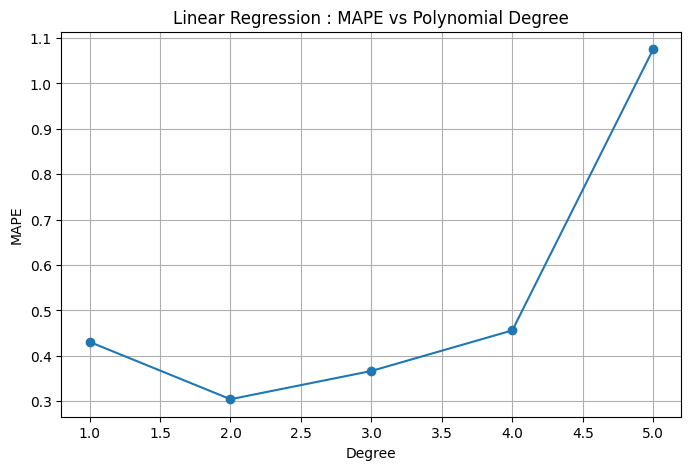

Lasso Regression 

Degree = 1 : Best Alpha = 0.001 : MAPE = 0.43097544384767217
Degree = 2 : Best Alpha = 0.001 : MAPE = 0.30458674038526795
Degree = 3 : Best Alpha = 10 : MAPE = 0.340106628161548

Best Polynomial Degree: 2
Best MAPE: 0.30458674038526795


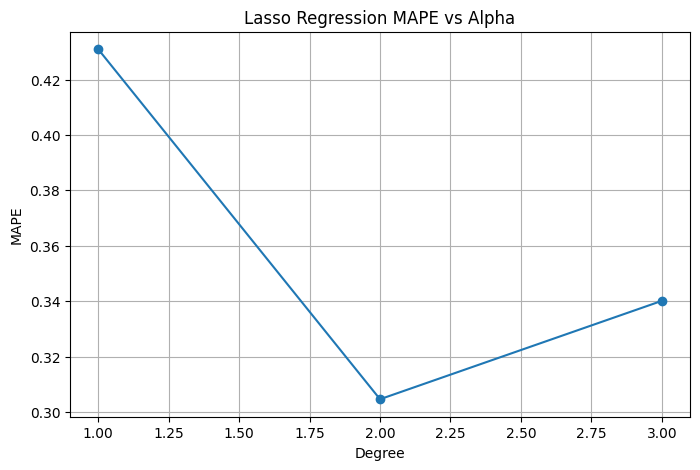

Ridge Regression 

Degree = 1 : Best Alpha = 0.001 : MAPE = 0.43097784783793286
Degree = 2 : Best Alpha = 0.001 : MAPE = 0.3045883364901215
Degree = 3 : Best Alpha = 1 : MAPE = 0.3562807134603379

Best Polynomial Degree: 2
Best MAPE: 0.3045883364901215


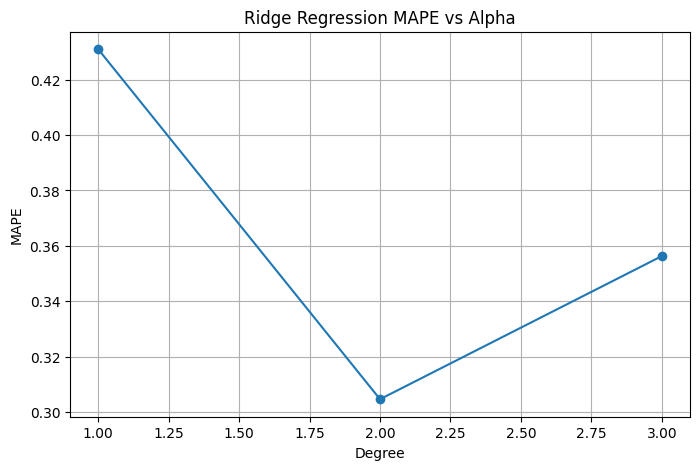

In [22]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn

def plot_mape_vs_degree(degrees, mape_scores, title='MAPE vs Polynomial Degree'):
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, mape_scores, marker='o', linestyle='-')
    plt.xlabel('Degree')
    plt.ylabel('MAPE')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Linear Regression

degrees = [1, 2, 3, 4, 5]

linear_mape_scores = []
print('Linear Regression', '\n')
for degree in degrees:
    linear_regressor = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_mape_scores = cross_val_score(linear_regressor, X_train, y_train, cv=kfold, scoring=model_mape_evalutation)
    linear_mape_scores.append(np.mean(model_mape_scores))
    print(f'Degree = {degree} : MAPE = {np.mean(model_mape_scores)}')

print('\n', f'Best Polynomial Degree: {degrees[np.argmin(linear_mape_scores)]}', sep='')
print(f'Best MAPE: {np.min(linear_mape_scores)}')

plot_mape_vs_degree(degrees, linear_mape_scores, 'Linear Regression : MAPE vs Polynomial Degree')

# Lasso Regression

degrees = [1, 2, 3]

alphas = [0.001, 0.01, 0.1, 1, 10, 100]

print('Lasso Regression', '\n')
lasso_mape_scores = []
for degree in degrees:
    current_degree_mape_scores = []
    for alpha in alphas:
        lasso_regressor = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=10000000))
        model_mape_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=kfold, scoring=model_mape_evalutation)
        current_degree_mape_scores.append(np.mean(model_mape_scores))
    
    lasso_mape_scores.append(min(current_degree_mape_scores))
    print(f'Degree = {degree} : Best Alpha = {alphas[np.argmin(current_degree_mape_scores)]} : MAPE = {min(current_degree_mape_scores)}')

print('\n', f'Best Polynomial Degree: {degrees[np.argmin(lasso_mape_scores)]}', sep='')
print(f'Best MAPE: {np.min(lasso_mape_scores)}')

plot_mape_vs_degree(degrees, lasso_mape_scores, 'Lasso Regression MAPE vs Alpha')

# Ridge Regression

print('Ridge Regression', '\n')
ridge_mape_scores = []
for degree in degrees:
    current_degree_mape_scores = []
    for alpha in alphas:
        ridge_regressor = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha, max_iter=10000000))
        model_mape_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=kfold, scoring=model_mape_evalutation)
        current_degree_mape_scores.append(np.mean(model_mape_scores))
    
    ridge_mape_scores.append(min(current_degree_mape_scores))
    print(f'Degree = {degree} : Best Alpha = {alphas[np.argmin(current_degree_mape_scores)]} : MAPE = {min(current_degree_mape_scores)}')

print('\n', f'Best Polynomial Degree: {degrees[np.argmin(ridge_mape_scores)]}', sep='')
print(f'Best MAPE: {np.min(ridge_mape_scores)}')

plot_mape_vs_degree(degrees, ridge_mape_scores, 'Ridge Regression MAPE vs Alpha')

Report your best model with its evaluated results.

In [23]:
# TODO: Print each model's loss on the training and the test set.

best_linear_regressor = make_pipeline(PolynomialFeatures(2), LinearRegression())
best_linear_regressor.fit(X_train, y_train)
print(f'Linear Regression Best Model MAPE = {model_mape_evalutation(best_linear_regressor, X_test, y_test)}')

best_lasso_regressor = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.001, max_iter=1000000))
best_lasso_regressor.fit(X_train, y_train)
print(f'Lasso Regression Best Model MAPE = {model_mape_evalutation(best_lasso_regressor, X_test, y_test)}')

best_ridge_regressor = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.001, max_iter=1000000))
best_ridge_regressor.fit(X_train, y_train)
print(f'Ridge Regression Best Model MAPE = {model_mape_evalutation(best_ridge_regressor, X_test, y_test)}')

Linear Regression Best Model MAPE = 0.29063664680735857
Lasso Regression Best Model MAPE = 0.290516663176638
Ridge Regression Best Model MAPE = 0.2905179146593707


In [24]:
X_test = pd.read_csv('./InsuranceData_test.csv')

mapping = {'yes': 1, 'no': 0}
X_test['smoker'] = X_test['smoker'].map(mapping)

transform = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_features),
    ('categorical', OneHotEncoder(), categorical_features),
    ('others', 'passthrough', other_features)
])

X_test_transformed = transform.fit_transform(X_test)

y_pred = best_lasso_regressor.predict(X_test_transformed)
submission = pd.DataFrame()
submission['charges'] = y_pred
submission.to_csv('./submission.csv', index=False)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** L1 regularization (Lasso) promotes sparsity by driving some feature weights to exactly zero, leading to a simpler model that effectively performs feature selection. In contrast, L2 regularization (Ridge) shrinks weights but generally retains all features, resulting in a weight distribution that is smoother and less sparse.</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** The regularization parameter, alpha, controls the strength of the penalty applied to the feature weights: a higher alpha in L1 regularization encourages more coefficients to become zero, enhancing model sparsity and interpretability by focusing on the most influential features. In L2 regularization, a larger alpha leads to smaller weights overall, which can stabilize the model but may obscure the relative importance of individual features. Thus, appropriate tuning of alpha can improve model explainability by emphasizing significant features while minimizing noise from less important ones.</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** 
When you add polynomial features to the data, it can make the model overly complex and lead to overfitting, where the model captures noise instead of the actual patterns. Regularization methods discourage the model from fitting to noise by adding a penalty to the loss function. Lasso, in particular, is useful because it can make some coefficients exactly zero, effectively selecting only the most important features. This is especially helpful in high-dimensional datasets, as it simplifies the model and makes it easier to interpret by reducing the number of features the model has to consider.</span>